# Week 5 -  Quantum information with multipartite systems <a class="tocSkip">
    (c) Ariel Guerreiro 2025

In this notebook, we will explore the nature of bipartite quantum systems and how they can become entangled, creating the famous Bell states. We will discuss the properties of entanglement and the role it plays in quantum information processing. Additionally, we will examine how noise and decoherence can disrupt the entanglement of a system, leading to the breakdown of quantum correlations.

Finally, we will introduce the Bell inequalities, which are a set of mathematical conditions that provide a way to test whether a system is truly entangled or not. These inequalities have important implications for our understanding of quantum mechanics and have been the subject of intense study for decades.

Throughout this notebook, we will use interactive examples and exercises to help you gain a deeper understanding of these complex topics.


# Before we start... <a class="tocSkip">

  Let us begin by runnning the initialization cell
    
$$
\def\ket#1{\left|#1\right\rangle }%
\def\bra#1{\left\langle #1\right|}%
\def\braket#1#2{\langle#1|#2\rangle}%
$$
   

In [11]:
# %%capture
# %pip install qiskit==1.3.2 pylatexenc
# %pip install qiskit-ibm-runtime==0.35.0

In [12]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2

# The Bell basis <a name='BellBasis'></a>


The Bell basis is a set of four maximally entangled states of two qubits that play a fundamental role in quantum information theory. They are important in the context of bipartite qubit systems because they provide a natural basis for describing entanglement between two qubits.

In particular, any bipartite pure state of two qubits can be expressed as a superposition of the four Bell states. This property makes the Bell basis useful for studying and characterizing entanglement in quantum systems, as it provides a convenient way to decompose any bipartite state into entangled and separable components.

For bipartite register, i.e. a set of two quantum registers each storing a qubit, the elements of Bell basis are defined as

\begin{align*}
\ket{\Phi^{+}} & :=\frac{1}{\sqrt{2}}\left(\ket{00}+\ket{11}\right)\\
\ket{\Phi^{-}} & :=\frac{1}{\sqrt{2}}\left(\ket{00}-\ket{11}\right)\\
\ket{\Psi^{+}} & :=\frac{1}{\sqrt{2}}\left(\ket{01}+\ket{10}\right)\\
\ket{\Psi^{-}} & :=\frac{1}{\sqrt{2}}\left(\ket{01}-\ket{10}\right)
\end{align*}


In [13]:
Phi_plus = [np.sqrt(0.5),0, 0, np.sqrt(0.5)]
Phi_minus = [np.sqrt(0.5),0, 0, -np.sqrt(0.5)]
Psi_plus = [0,np.sqrt(0.5), np.sqrt(0.5),0]
Psi_minus = [0,np.sqrt(0.5),- np.sqrt(0.5),0]

phi_plus = Statevector(Phi_plus)
phi_minus = Statevector(Phi_minus)
psi_plus = Statevector(Psi_plus)
psi_minus = Statevector(Psi_minus)

outcome, state = phi_plus.measure()
print(f"{outcome = }")
print("Pre-measurement state:"); display(phi_plus.draw("latex")) # u is not modified by measurement
print("Post-measurement state:"); display(state.draw("latex"))


outcome = '00'
Pre-measurement state:


<IPython.core.display.Latex object>

Post-measurement state:


<IPython.core.display.Latex object>

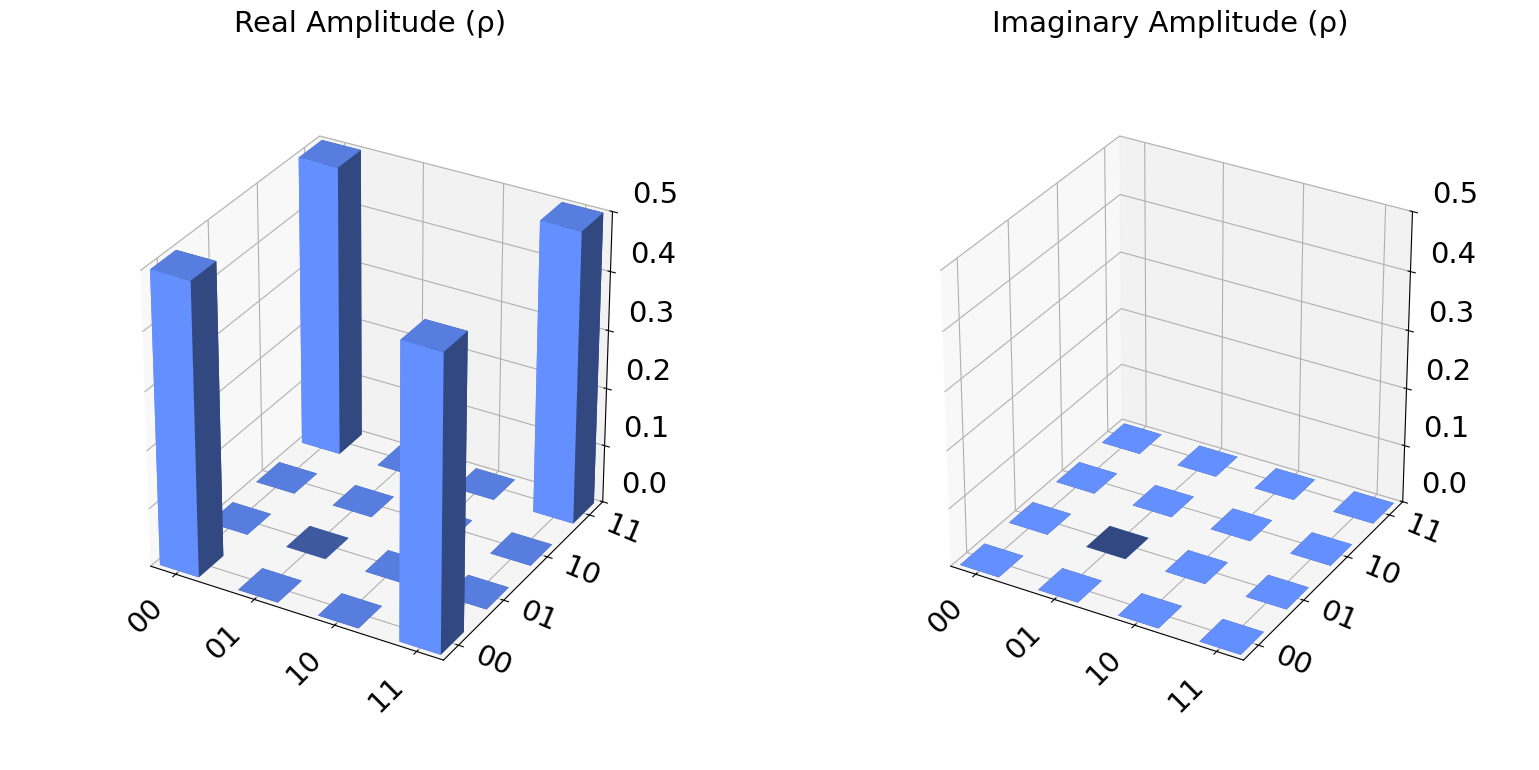

In [14]:
plot_state_city(phi_plus)

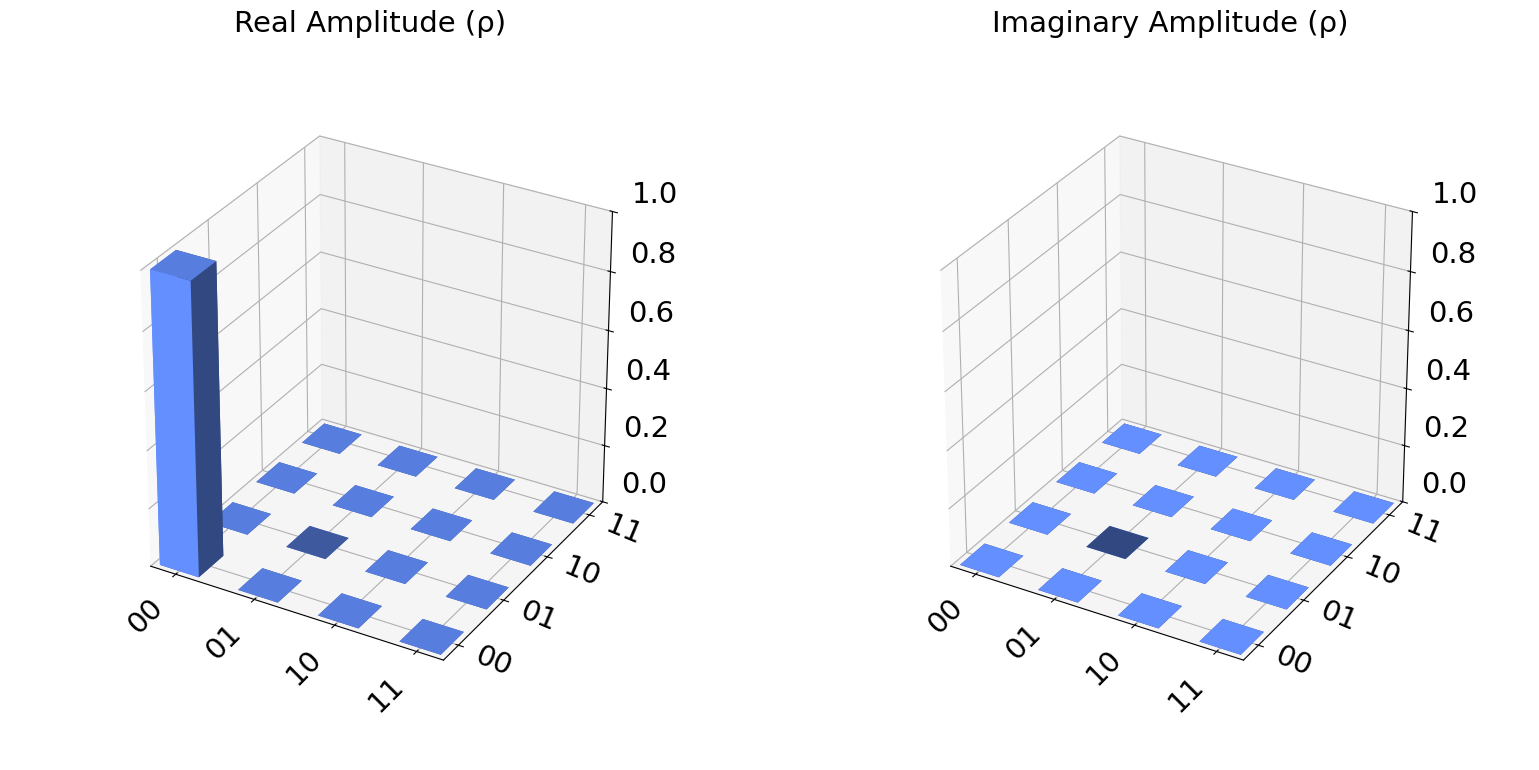

In [15]:
plot_state_city(state)

<div class="alert alert-block alert-warning">
<b>Code Explained: </b>    
The code then defines four quantum states, namely Phi_plus, Phi_minus, Psi_plus, and Psi_minus. It then creates a quantum circuit using the QuantumRegister and ClassicalRegister objects from qiskit. The circuit is initialized in the Phi_minus state on the first and second qubits. We then simulate the measurements and output state. finally the plot_state_city function is called from qiskit's visualization module to create a city-plot representation of the output state.
    
</div>

This will produce a plot_state_city plot of the Bell state, which will have non-zero off-diagonal elements. This suggests that the Bell state is entangled.

Note that plot_state_city is not always the most useful tool for visualizing entanglement, as it can be difficult to visually identify off-diagonal elements in larger systems. Other tools, such as plot_state_qsphere or plot_bloch_multivector, may be more helpful in some cases.

If we try to measure/observe Bell states in the canonical basis, we will collapse the state of the qubits into one of the two computational basis states with equal probability. This is because Bell states are superpositions of computational basis states, and a measurement in the computational basis will collapse the state into one of the basis states with a probability proportional to the squared amplitude of that basis state in the superposition. Therefore, measuring a Bell state in the computational basis will destroy the entanglement between the qubits.

counts1: {'00': 4892, '11': 5108}
counts2: {'11': 5092, '00': 4908}
counts3: {'10': 4933, '01': 5067}
counts4: {'01': 4967, '10': 5033}


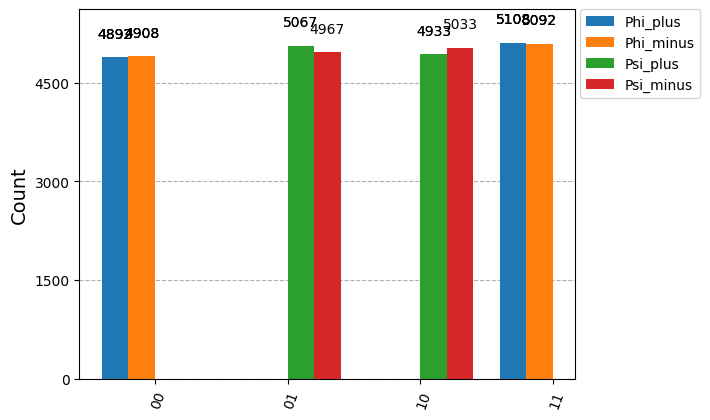

In [16]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler

q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')

# Create a simple circuit that generates a superposition state
circuit1 = QuantumCircuit(q,c)

circuit1.initialize(Phi_plus, [q[0],q[1]])
circuit1.measure(q[0],c[0])
circuit1.measure(q[1],c[1])

circuit2 = QuantumCircuit(q,c)
circuit2.initialize(Phi_minus, [q[0],q[1]])
circuit2.measure(q[0],c[0])
circuit2.measure(q[1],c[1])

circuit3 = QuantumCircuit(q,c)
circuit3.initialize(Psi_plus, [q[0],q[1]])
circuit3.measure(q[0],c[0])
circuit3.measure(q[1],c[1])

circuit4 = QuantumCircuit(q,c)
circuit4.initialize(Psi_minus, [q[0],q[1]])
circuit4.measure(q[0],c[0])
circuit4.measure(q[1],c[1])


# Instantiate the StatevectorSampler primitive
sampler = StatevectorSampler()
NSHOTS = 10000

job = sampler.run([circuit1], shots=NSHOTS)
results = job.result()[0] # the "0" index is because you can run more than one circuit
counts1 = results.data.c.get_counts() # "meas" is the default name for the classical register

job = sampler.run([circuit2], shots=NSHOTS)
results = job.result()[0] # the "0" index is because you can run more than one circuit
counts2 = results.data.c.get_counts() # "meas" is the default name for the classical register

job = sampler.run([circuit3], shots=NSHOTS)
results = job.result()[0] # the "0" index is because you can run more than one circuit
counts3 = results.data.c.get_counts() # "meas" is the default name for the classical register

job = sampler.run([circuit4], shots=NSHOTS)
results = job.result()[0] # the "0" index is because you can run more than one circuit
counts4 = results.data.c.get_counts() # "meas" is the default name for the classical register

print('counts1:',counts1)
print('counts2:',counts2)
print('counts3:',counts3)
print('counts4:',counts4)
plot_histogram([counts1,counts2,counts3,counts4],legend=['Phi_plus','Phi_minus','Psi_plus','Psi_minus'])

This illustrates that entanglement cannot be observed directly, but can only be inferred through measurements performed on multiple copies of the system. It also emphasizes the importance of preserving the entanglement of a system when performing quantum information processing tasks, as any measurement that destroys the entanglement will lead to the loss of quantum information.

# Bell inequalities

Bell inequalities are a set of mathematical inequalities that express constraints on the possible correlation between the outcomes of measurements made on two spatially separated quantum systems. These inequalities were first derived by John S. Bell in the 1960s, and they played a crucial role in demonstrating that quantum mechanics violates the principles of local realism, which is the idea that physical objects have definite properties, independent of measurements and that these properties can be transmitted between objects no faster than the speed of light.

The violation of Bell inequalities has important implications for quantum information processing, as it demonstrates that entangled quantum states cannot be explained by classical physics and suggests the possibility of using quantum entanglement for communication and computation tasks that are impossible using classical resources.

In particular, the violation of Bell inequalities is the basis for quantum key distribution (QKD), a protocol that allows two parties to establish a shared secret key with information-theoretic security, even in the presence of an eavesdropper. Bell tests have also been used in experimental demonstrations of quantum teleportation, quantum dense coding, and quantum error correction.

Measurement results:
{'00': 4999, '11': 5001}


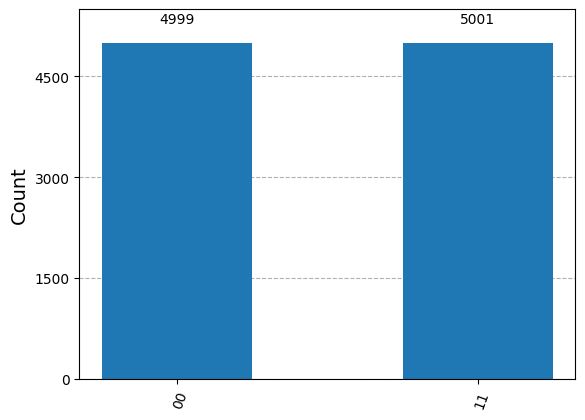

In [17]:
# Create a circuit with two qubits and two classical bits
circuit10 = QuantumCircuit(2, 2)

# Apply Hadamard gate to the first qubit
circuit10.h(0)

# Apply CNOT gate to entangle the two qubits
circuit10.cx(0, 1)

# Measure the two qubits
circuit10.measure(0, 0)
circuit10.measure(1, 1)

# Instantiate the StatevectorSampler primitive
sampler = StatevectorSampler()
NSHOTS = 10000

job = sampler.run([circuit10], shots=NSHOTS)
results = job.result()[0] # the "0" index is because you can run more than one circuit
counts10 = results.data.c.get_counts() # "meas" is the default name for the classical register

# Print the results
print("Measurement results:")
print(counts10)

# Plot the histogram of the results
plot_histogram(counts10)

This circuit prepares the Bell state $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$ and measures the two qubits in the computational basis. The results of the measurements are then used to verify Bell inequalities.


The circuit creates an entangled state of two qubits, which is a key ingredient in the violation of Bell inequalities. When the two qubits are measured, they will be found in one of the four possible basis states |00⟩, |01⟩, |10⟩, and |11⟩ with some probabilities. These probabilities are related to the state of the qubits before measurement, which in the case of entangled qubits cannot be described by local hidden variables.

Bell inequalities are mathematical expressions that can be derived from the assumptions of local realism and stochasticity. Local realism states that the outcomes of measurements on one particle cannot be influenced by measurements performed on the other particle if the two particles are sufficiently far apart. Stochasticity assumes that the outcomes of measurements are probabilistic and that the probabilities are determined by local hidden variables.

However, experiments have shown that entangled quantum particles violate Bell inequalities, indicating that they do not behave according to local realism and stochasticity. This violation can be seen as evidence that quantum mechanics does not allow for a description of nature that is both local and realistic.

The circuit in the code is a simple example of an entangled state that can violate Bell inequalities. The expected results of the measurements are that the |00⟩ and |11⟩ states are more likely to occur than the |01⟩ and |10⟩ states. These probabilities cannot be explained by local hidden variables and are a signature of entanglement in quantum mechanics.

Here's a code that allows you to vary the degree of entanglement and compare the predictions of quantum and classical theory with the results of the simulation using a bar chart:

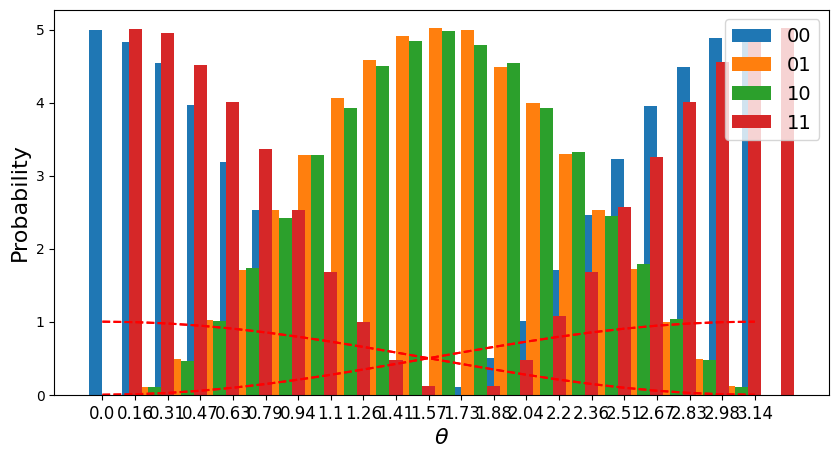

In [18]:
# Define a function to create the circuit for a given degree of entanglement
def create_circuit(theta):
    circuit = QuantumCircuit(2, 2)
    circuit.h(0)
    circuit.cx(0, 1)
    circuit.ry(2 * theta, 1)  # Rotate the second qubit by 2*theta around the y-axis
    circuit.measure(0, 0)
    circuit.measure(1, 1)
    return circuit

# Define a function to calculate the theoretical probabilities for a given degree of entanglement
def calculate_theoretical_probabilities(theta):
    p00 = np.cos(theta/2)**2
    p01 = np.sin(theta/2)**2
    p10 = np.sin(theta/2)**2
    p11 = np.cos(theta/2)**2
    return [p00, p01, p10, p11]

# Define the range of values of theta to explore
theta_range = np.linspace(0, np.pi, 21)

# Run the simulations and calculate the probabilities for each value of theta
sampler = StatevectorSampler()
NSHOTS = 10000
results = []
for theta in theta_range:
    circuit = create_circuit(theta)
    job = sampler.run([circuit], shots=NSHOTS)
    job_results = job.result()[0]
    counts = job_results.data.c.get_counts()
    #counts = result.get_counts()
    p00 = counts.get('00', 0) / 1000
    p01 = counts.get('01', 0) / 1000
    p10 = counts.get('10', 0) / 1000
    p11 = counts.get('11', 0) / 1000
    results.append([p00, p01, p10, p11])

# Calculate the theoretical probabilities for each value of theta
theoretical_results = [calculate_theoretical_probabilities(theta) for theta in theta_range]

# Plot the results
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(theta_range))-0.2, [r[0] for r in results], width=0.4, label='00')
plt.bar(np.arange(len(theta_range))+0.2, [r[1] for r in results], width=0.4, label='01')
plt.bar(np.arange(len(theta_range))+0.6, [r[2] for r in results], width=0.4, label='10')
plt.bar(np.arange(len(theta_range))+1.0, [r[3] for r in results], width=0.4, label='11')
plt.plot(np.arange(len(theta_range)), theoretical_results, 'r--')
plt.xticks(np.arange(len(theta_range)), np.round(theta_range, 2), fontsize=12)
plt.xlabel(r'$\theta$', fontsize=16)
plt.ylabel('Probability', fontsize=16)
plt.legend(fontsize=14)
plt.show()


The graphic produced by the previous code shows the results of the simulation and the predictions of the quantum theory for different degrees of entanglement between the two qubits.

The horizontal axis represents the degree of entanglement, which is controlled by the parameter theta. The values of theta range from 0 to pi/2, which correspond to no entanglement and maximum entanglement, respectively.

The vertical axis represents the probability of obtaining the result 00 when measuring the two qubits after applying the Hadamard gate and the CNOT gate. This probability is obtained by dividing the number of times that the result 00 is obtained in the simulation by the total number of shots.

The comparison between the results of the simulation and the predictions of the quantum and classical theories allows us to see the effect of entanglement on the correlations between the two qubits. When the two qubits are maximally entangled, the probabilities predicted by the quantum theory are close to 1, while the probabilities predicted by the classical theory are close to 0. This shows that entanglement is a characteristic feature of quantum mechanics that cannot be explained by classical theories.

**EXERCISES:**
    
**Exercise 1:**

Determine the amount of entanglement of the states (you can use a monotone if necessary):
    
   a) $ |\psi\rangle = \sqrt{\mu} |\Phi^{+}\rangle + \sqrt{1-\mu} \exp{(i\theta)}|\Phi^{-}\rangle $
     as a function of $\mu$ and $\theta$;
    
   b) $ \rho = p |\Phi^{+}\rangle\langle\Phi^{+}| + (1-p) |\Phi^{-}\rangle \langle\Phi^{-}|$
     as a function of $\mu$.
    
    
**Exercise 2:**

Determine the amount of entanglement of the states (you can use a monotone if necessary):
    
   a) $ |\psi\rangle = \sqrt{\mu} |\Phi^{+}\rangle + \sqrt{1-\mu} \exp{(i\theta)}|\Psi^{-}\rangle $
     as a function of $\mu$ and $\theta$;
    
   b) $ \rho = p |\Phi^{+}\rangle\langle\Phi^{+}| + (1-p) |\Psi^{-}\rangle \langle\Psi^{-}|$
     as a function of $\mu$.
    
    
**Exercise 3:**

What can you conclude from the previous two questions?

**Exercise 4:(extra credits)**

Develop an experiment to measure the evolution of the entropy and degree of entanglement as a function of time in the presence of noise.
    
**Exercise 5: (extra credits)**

Compare the results of the numerical experiments of the previous question with a real experiment in the IBM computer. (Yes, you need to get a token!)

<div class="alert alert-success">
<b>Today's afterthoughts:</b>

How do the concepts of entanglement and noise challenge our classical understanding of reality and influence our philosophical views on the nature of the universe?
</div>